## Author info
### Name : Mohamed Mahmoud AlJubaily 
### ID : 22510468 

In [10]:
# import the needed libraries for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\silve\Desktop\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Checking process 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
df[df.duplicated]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [6]:
# so there is no null values however the Insulin column has a lot of missing values in 0 value. 

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<Axes: >

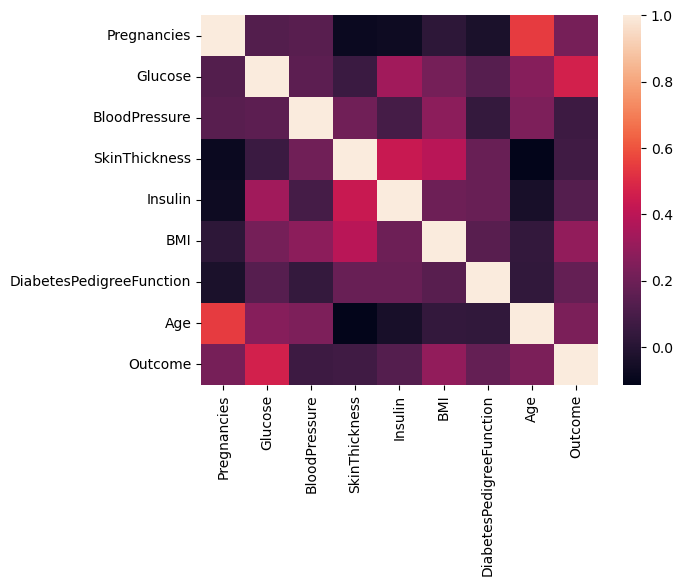

In [11]:
corr = df.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

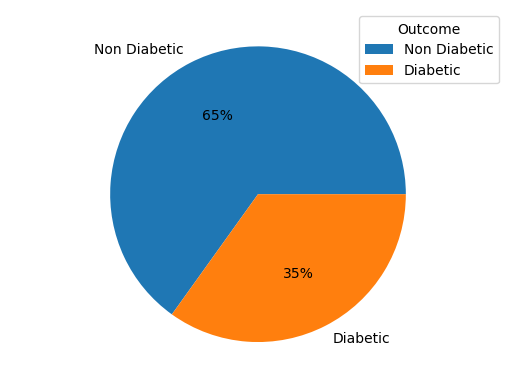

In [13]:
# Let's see the difference between the people who has diabetes or not 
outcome_count = df["Outcome"].value_counts()
outcome_count
plt.axis("equal")
plt.pie(outcome_count, labels = ["Non Diabetic","Diabetic"],autopct='%0.0f%%')
plt.legend(title="Outcome")
plt.show()

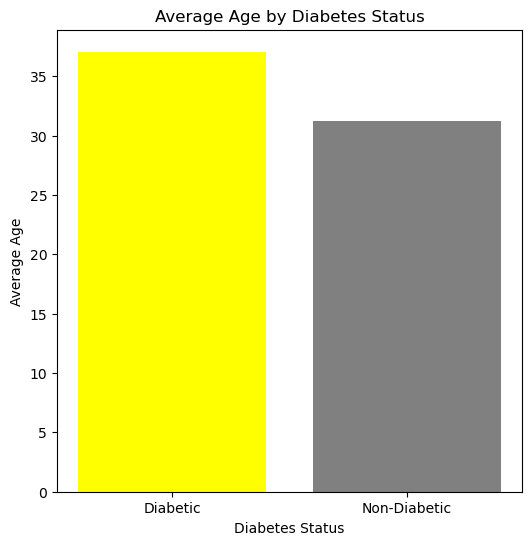

In [32]:
# This chart represent the differance in the mean age between Diabetic and non-Diabetic patients 
diabetic_patients = df[df['Outcome']==1]
nondiabetic_patients = df[df['Outcome']==0]

avg_DP = diabetic_patients['Age'].mean()
avg_nonDP = nondiabetic_patients['Age'].mean()

plt.figure(figsize=(6, 6))
plt.bar(["Diabetic", "Non-Diabetic"], [avg_DP, avg_nonDP], color=['yellow', 'gray'])
plt.xlabel("Diabetes Status")
plt.ylabel("Average Age")
plt.title("Average Age by Diabetes Status")
plt.show()

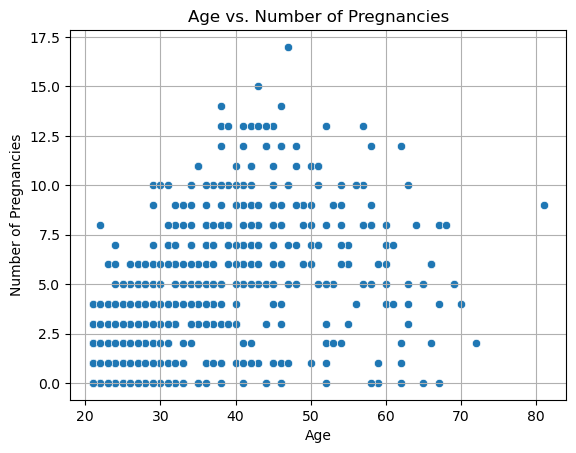

In [64]:
# This chart represent the correlation between age and number of pregnancies 
sns.scatterplot(x="Age", y="Pregnancies", data=df)
plt.xlabel("Age")
plt.ylabel("Number of Pregnancies")
plt.title("Age vs. Number of Pregnancies")
plt.grid(True)
plt.show()

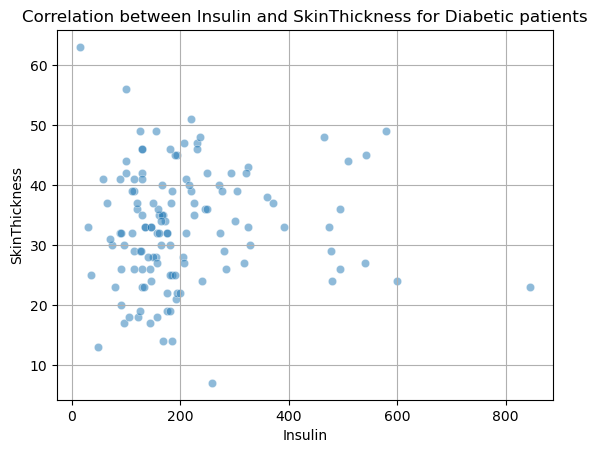

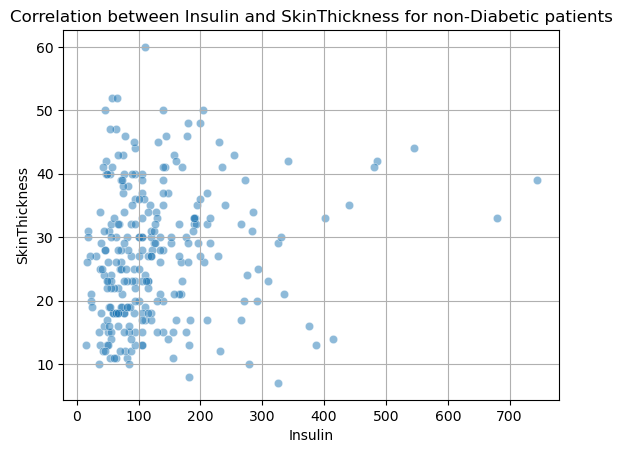

In [63]:
# This chart represent the correlation between insulin and skinthickness 
# Filter for non-zero insulin values
nonZeroIns = df[df['Insulin'] != 0]

# Filter for diabetic and non-diabetic groups
diabetic = nonZeroIns[nonZeroIns["Outcome"] == 1]
non_diabetic = nonZeroIns[nonZeroIns["Outcome"] == 0]

sns.scatterplot(x="Insulin", y="SkinThickness", data=diabetic, alpha=0.5)
plt.xlabel("Insulin")
plt.ylabel("SkinThickness")
plt.title("Correlation between Insulin and SkinThickness for Diabetic patients")
plt.grid(True)
plt.show()

sns.scatterplot(x="Insulin", y="SkinThickness", data=non_diabetic, alpha=0.5)
plt.xlabel("Insulin")
plt.ylabel("SkinThickness")
plt.title("Correlation between Insulin and SkinThickness for non-Diabetic patients")
plt.grid(True)
plt.show()

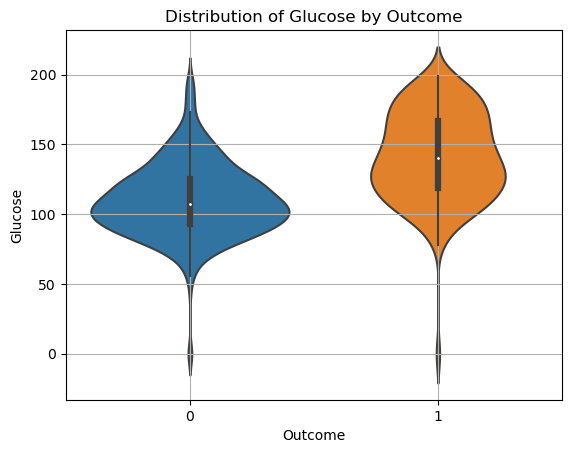

In [51]:
# This chart represent the correlation between outcome and glocuse 
sns.violinplot(x="Outcome", y="Glucose", data=df, showmeans=True)
plt.xlabel("Outcome")
plt.ylabel("Glucose")
plt.title("Distribution of Glucose by Outcome")
plt.grid(True)
plt.show()

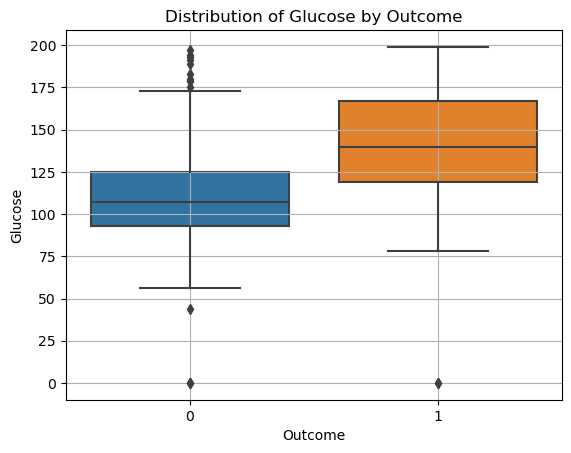

In [52]:
sns.boxplot(x="Outcome", y="Glucose", data=df)
plt.xlabel("Outcome")
plt.ylabel("Glucose")
plt.title("Distribution of Glucose by Outcome")
plt.grid(True)
plt.show()

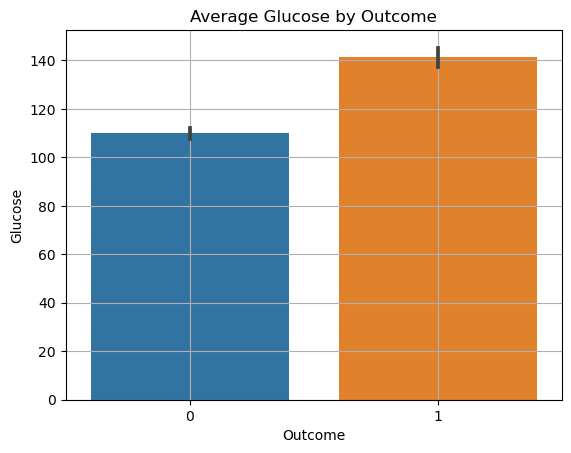

In [53]:
sns.barplot(x="Outcome", y="Glucose", data=df)
plt.xlabel("Outcome")
plt.ylabel("Glucose")
plt.title("Average Glucose by Outcome")
plt.grid(True)
plt.show()


## At the end the conclusion I came up with after analyzing the dataset:
- Since most data in the dataset are numerical, I used heatmaps and correlations to identify relationships between variables. 
- Multiple factors contribute to developing diabetes, but notably, age and higher glucose levels are significant markers. 
- There's a positive correlation between age and number of pregnancies. Interestingly, a significant portion of subjects aged 20-30 had up to 6 pregnancies, and this isn't uncommon. By 30-40 years old, the average number of pregnancies increases substantially for many individuals, with some reaching 16 pregnancies.
- While these findings are informative, it's important to acknowledge potential limitations, such as the sample size and potential data biases. Additionally, exploring other potentially relevant factors could lead to a more comprehensive understanding.
- At the end 
### TO BE CONTINUED AFTER LEARNING MACHINE LEARNING
